### Import libraries

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist

In [11]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

### Rescale

In [12]:
x_train = np.array(x_train)
x_train, x_test = x_train/255.0, x_test/255.0

### Model

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [14]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [15]:
r = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2956 - accuracy: 0.9128 - val_loss: 0.1453 - val_accuracy: 0.9556
Epoch 2/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.1438 - accuracy: 0.9560 - val_loss: 0.0977 - val_accuracy: 0.9725
Epoch 3/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.1074 - accuracy: 0.9680 - val_loss: 0.0826 - val_accuracy: 0.9751
Epoch 4/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0858 - accuracy: 0.9724 - val_loss: 0.0803 - val_accuracy: 0.9751
Epoch 5/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0747 - accuracy: 0.9763 - val_loss: 0.0734 - val_accuracy: 0.9799
Epoch 6/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0628 - accuracy: 0.9798 - val_loss: 0.0704 - val_accuracy: 0.9795
Epoch 7/10
60000/60000 [==============================] 

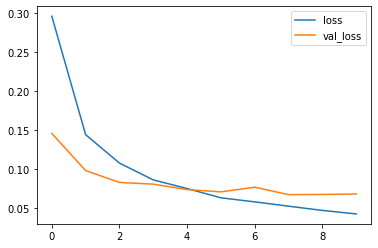

In [20]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

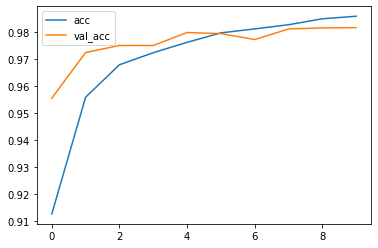

In [22]:
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()

In [24]:
print(model.evaluate(x_test, y_test))

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.06771641665786737, 0.9817]


Confusion matrix, without normalization
[[ 971    0    1    1    1    0    1    1    3    1]
 [   0 1125    1    3    0    0    1    1    4    0]
 [   4    2 1009    2    2    0    2    4    7    0]
 [   0    0    3  999    0    2    0    4    2    0]
 [   2    0    1    1  958    0    4    3    3   10]
 [   2    0    0   10    1  869    2    1    6    1]
 [   5    3    0    1    6    3  936    0    4    0]
 [   1    2   11    0    0    0    0 1008    1    5]
 [   5    0    1    4    3    0    1    5  953    2]
 [   3    2    0    4    5    1    0    3    2  989]]


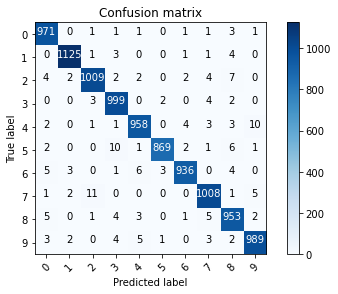

In [28]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion matrix',cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix. Normalization can be applied by setting normalize = True.
    """
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), 
                horizontalalignment = "center",
                color = "white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
p_test = model.predict(x_test).argmax(axis = 1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))
            

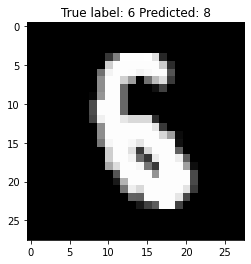

In [31]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap = 'gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));